In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os, random, cv2


import keras as keras
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input
from keras.models import Sequential,Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D

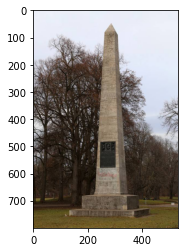

In [2]:
train_df = pd.read_csv("../input/landmark-retrieval-2020/train.csv")
landmark_id = train_df.landmark_id.unique()
test_img = [] #初期化
test_img_ = [] #初期化
test_id = []
pair_img=2
for ID_N in range(10):
    train_df_id = train_df.loc[train_df.landmark_id == landmark_id[ID_N]]
    train_df_id = train_df_id.reset_index(drop=True)
    if len(train_df_id)>=pair_img:
        test_id.append(landmark_id[ID_N])

        num1 = str(train_df_id.id[0])[0]
        num2 = str(train_df_id.id[0])[1]
        num3 = str(train_df_id.id[0])[2]
        filename = str(train_df_id.iloc[0, 0])

        filepath = "../input/landmark-retrieval-2020/train/" +num1+ "/" +num2+"/" +num3+ "/" + filename + ".jpg"
        test_img.append(np.array(Image.open(filepath).convert('RGB')))
        test_img_.append(image.img_to_array(image.load_img(filepath)))
plt.imshow(test_img[0])

In [36]:
tr_data=[]
te_data=[]

train_df = pd.read_csv("../input/landmark-retrieval-2020/train.csv")
landmark_id = train_df.landmark_id.unique()
for ID_N in range(len(landmark_id)):
    if ID_N%1000==0:
        print(ID_N)
    train_df_id = train_df.loc[train_df.landmark_id == landmark_id[ID_N]]
    train_df_id = train_df_id.reset_index(drop=True)
    if len(train_df_id)>=20:
        for i in range(len(train_df_id)):
            if i<4:
                te_data.append([train_df_id.id[i],train_df_id.landmark_id[i]])
            else:
                tr_data.append([train_df_id.id[i],train_df_id.landmark_id[i]])
    else:
        for i in range(len(train_df_id)):
            tr_data.append([train_df_id.id[i],train_df_id.landmark_id[i]])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000


In [37]:
print(len(tr_data))
print(len(te_data))
print("TR",tr_data[0:4])
print("TE",te_data[0:4])

1497546
82924
TR [['17660ef415d37059', 1], ['92b6290d571448f6', 1], ['cd41bf948edc0340', 1], ['fb09f1e98c6d2f70', 1]]
TE [['1a6cb1deed46bb17', 11], ['1cc2c8fbc83e1a0c', 11], ['2361b8da868c9113', 11], ['32652480a7d99c5e', 11]]


In [38]:
te=pd.DataFrame(te_data, columns=['id', 'landmark_id'])
tr=pd.DataFrame(tr_data, columns=['id', 'landmark_id'])

In [39]:
tr


,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1497541,72c3b1c367e3d559,203092
1497542,7a6a2d9ea92684a6,203092
1497543,9401fad4c497e1f9,203092
1497544,aacc960c9a228b5f,203092


In [40]:
te

,id,landmark_id
0,1a6cb1deed46bb17,11
1,1cc2c8fbc83e1a0c,11
2,2361b8da868c9113,11
3,32652480a7d99c5e,11
4,0a199c97c382b1ff,12
...,...,...
82919,14904b2f48bc42eb,203071
82920,1def5ad0872c6303,203083
82921,23349c63e48a7de2,203083
82922,2c9d17eeb31f030c,203083


In [41]:
te.to_csv('te_data.csv')
tr.to_csv('tr_data.csv')

In [42]:
Te = pd.read_csv("./te_data.csv")

In [43]:
Te

,Unnamed: 0,id,landmark_id
0,0,1a6cb1deed46bb17,11
1,1,1cc2c8fbc83e1a0c,11
2,2,2361b8da868c9113,11
3,3,32652480a7d99c5e,11
4,4,0a199c97c382b1ff,12
...,...,...,...
82919,82919,14904b2f48bc42eb,203071
82920,82920,1def5ad0872c6303,203083
82921,82921,23349c63e48a7de2,203083
82922,82922,2c9d17eeb31f030c,203083


In [44]:
train_df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [45]:
from zipfile import ZipFile

with ZipFile('csv.zip','w') as zip:           
    zip.write('./te_data.csv', arcname='te_data.csv') 
    zip.write('./tr_data.csv', arcname='tr_data.csv') 